In [182]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 


In [183]:
# Reading the file from the specified file location
X = pd.read_csv('C:/Users/palla/Desktop/DS project/CC GENERAL_new.csv') 
X

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17895,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
17896,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,48.886365,0.000000,6
17897,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
17898,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [184]:

# Handling the missing values 
X.fillna(method ='ffill', inplace = True) 

print(X.head()) 

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [185]:
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 

# Normalizing the data so that 
# the data approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 

# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 


In [186]:
#Applying PCA for feature reduction

pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
print(X_principal.head()) 


         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544827
2  0.330633  0.268880
3 -0.481656 -0.097611
4 -0.563512 -0.482506


In [171]:
# Numpy array of all the cluster labels assigned to each data point 
db_default = DBSCAN(eps = 0.0375, min_samples = 6).fit(X_principal) 
labels = db_default.labels_ 


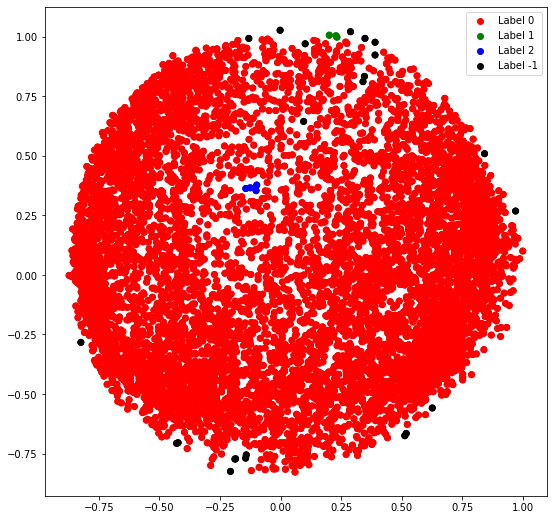

In [172]:
# Building the label to colour mapping 
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 



# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 

# Building the legend 
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1')) 

plt.show() 


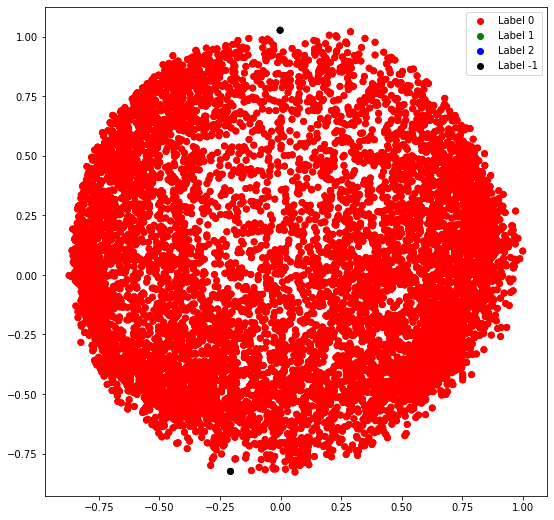

In [173]:
# Numpy array of all the cluster labels assigned to each data point 
db_default = DBSCAN(eps = 0.05, min_samples = 6).fit(X_principal) 
labels = db_default.labels_ 

# Building the label to colour mapping 
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 



# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 

# Building the legend 
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1')) 

plt.show() 



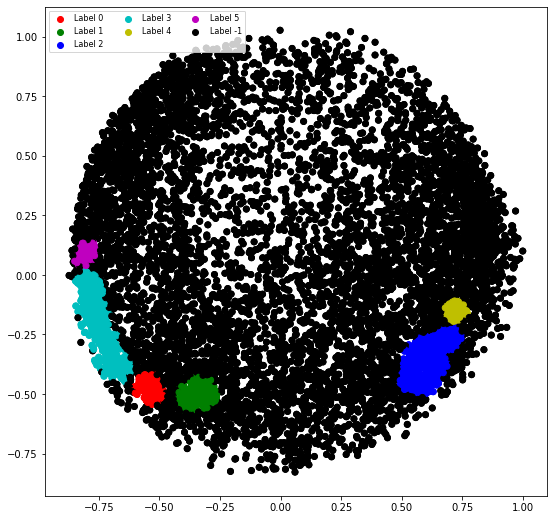

In [175]:
# Numpy array of all the cluster labels assigned to each data point 
db_default1 = DBSCAN(eps = 0.0375, min_samples = 100).fit(X_principal) 
labels1 = db_default1.labels_ 


colours1 = {} 


colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'


# Building the colour vector for each data point 
cvec = [colours1[label] for label in labels1] 

plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 

plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 
            'Label 5', 'Label -1'), 
           scatterpoints = 1, 
           loc ='upper left', 
           ncol = 3, 
           fontsize = 8) 



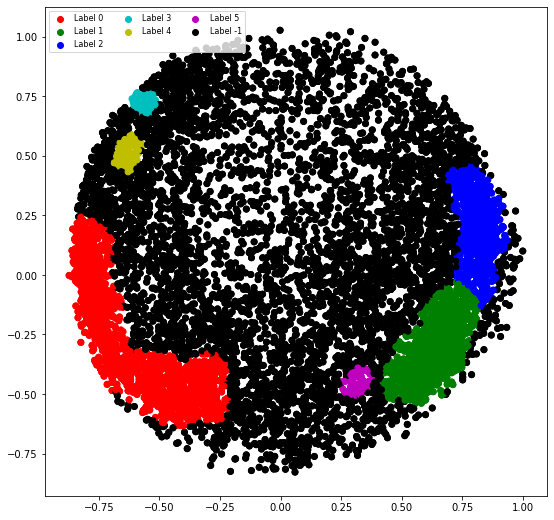

In [177]:
# Numpy array of all the cluster labels assigned to each data point 

#Increasing the value of eps while keeping min_samples values constant as previously
db_default1 = DBSCAN(eps = 0.05, min_samples = 100).fit(X_principal) 
labels1 = db_default1.labels_ 


colours1 = {} 


colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'


# Building the colour vector for each data point 
cvec = [colours1[label] for label in labels1] 

plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 

plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 
            'Label 5', 'Label -1'), 
           scatterpoints = 1, 
           loc ='upper left', 
           ncol = 3, 
           fontsize = 8) 



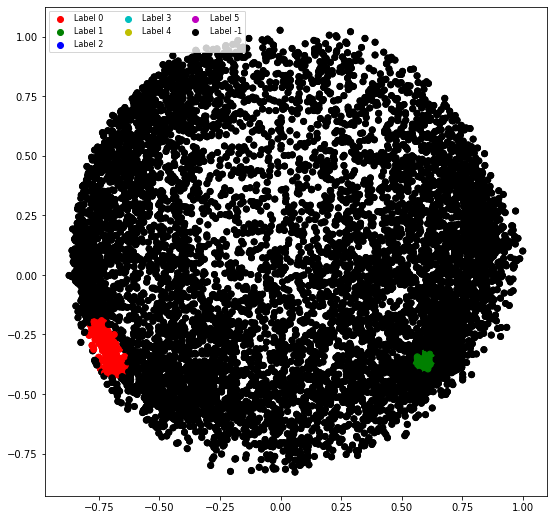

In [178]:
# Numpy array of all the cluster labels assigned to each data point 
db_default1 = DBSCAN(eps = 0.0375, min_samples = 160).fit(X_principal) 
labels1 = db_default1.labels_ 


colours1 = {} 


colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'


# Building the colour vector for each data point 
cvec = [colours1[label] for label in labels1] 

plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 

plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 
            'Label 5', 'Label -1'), 
           scatterpoints = 1, 
           loc ='upper left', 
           ncol = 3, 
           fontsize = 8) 



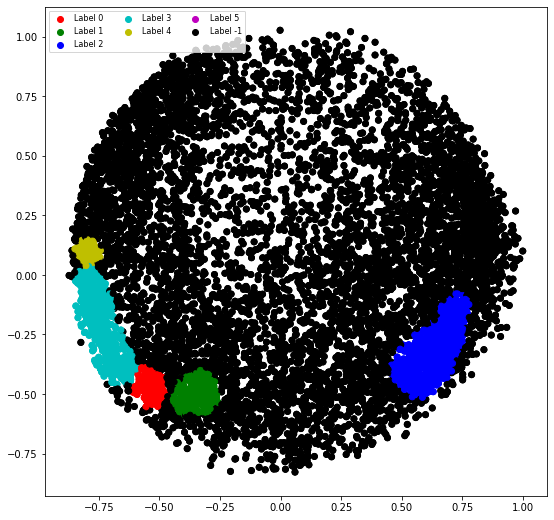

In [179]:
# Numpy array of all the cluster labels assigned to each data point 

#Increasing the value of eps while keeping min_samples values constant as previously
db_default1 = DBSCAN(eps = 0.05, min_samples = 160).fit(X_principal) 
labels1 = db_default1.labels_ 


colours1 = {} 


colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'


# Building the colour vector for each data point 
cvec = [colours1[label] for label in labels1] 

plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 

plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 
            'Label 5', 'Label -1'), 
           scatterpoints = 1, 
           loc ='upper left', 
           ncol = 3, 
           fontsize = 8) 



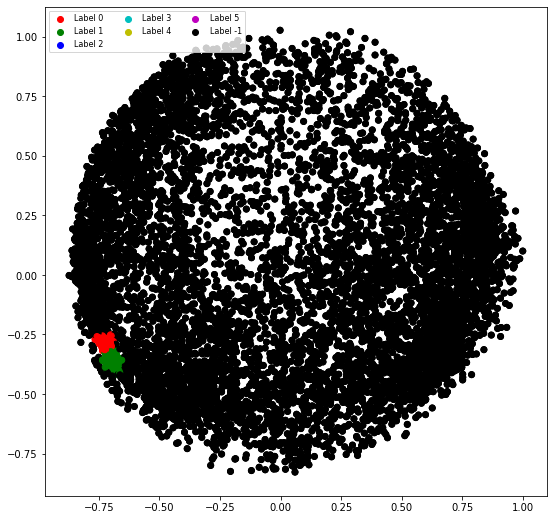

In [180]:
# Numpy array of all the cluster labels assigned to each data point 
db_default1 = DBSCAN(eps = 0.0375, min_samples = 200).fit(X_principal) 
labels1 = db_default1.labels_ 


colours1 = {} 


colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'


# Building the colour vector for each data point 
cvec = [colours1[label] for label in labels1] 

plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 

plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 
            'Label 5', 'Label -1'), 
           scatterpoints = 1, 
           loc ='upper left', 
           ncol = 3, 
           fontsize = 8) 



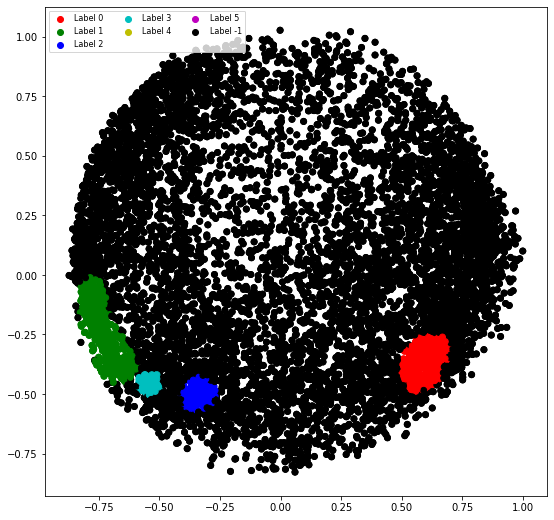

In [181]:
# Numpy array of all the cluster labels assigned to each data point 

#Increasing the value of eps while keeping min_samples values constant as previously
db_default1 = DBSCAN(eps = 0.05, min_samples = 200).fit(X_principal) 
labels1 = db_default1.labels_ 


colours1 = {} 


colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'


# Building the colour vector for each data point 
cvec = [colours1[label] for label in labels1] 

plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 

plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 
            'Label 5', 'Label -1'), 
           scatterpoints = 1, 
           loc ='upper left', 
           ncol = 3, 
           fontsize = 8) 

